In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.sample(n=5)#take random samples from data

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
160512,2015-01-12 00:00:00,B6,1482.0,RIC,BOS,-9.0,0.0,474.0,NaN,NaN,NaN,NaN,NaN,86.0
151179,2015-01-05 00:00:00,US,660.0,PHX,SNA,-10.0,0.0,338.0,NaN,NaN,NaN,NaN,NaN,71.0
146771,2015-01-02 00:00:00,US,895.0,PHX,ORD,-1.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,195.0
35408,2015-01-02 00:00:00,DL,2457.0,RSW,ATL,-13.0,0.0,515.0,NaN,NaN,NaN,NaN,NaN,99.0
126008,2015-01-14 00:00:00,OO,5636.0,SFO,MFR,4.0,0.0,329.0,NaN,NaN,NaN,NaN,NaN,73.0


<p><B>Which airlines are doing better at getting you there on time, and which airports are the worst to fly out of?<B></p> <p> Which airlines have the most delay?</p>
    <ul><li> Got to find a way to mask the data according to delays</li></ul>

In [4]:
data['delayed'] = data['arr_delay'].apply(lambda x: x > 0) 
#lambda is equivalent to: 
#def is_delayed(x):
#    return x > 0
#returns true if positive arrival delay time
data.columns

Index(['flight_date', 'unique_carrier', 'flight_num', 'origin', 'dest',
       'arr_delay', 'cancelled', 'distance', 'carrier_delay', 'weather_delay',
       'late_aircraft_delay', 'nas_delay', 'security_delay',
       'actual_elapsed_time', 'delayed'],
      dtype='object')

In [5]:
#create a data set of delayed flights
delayed_flights = data[data['delayed'] == True] 
delayed_flights.sample(n=5)

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
94057,2015-01-12 00:00:00,WN,1158.0,DAL,LAX,15.0,0.0,1246.0,0.0,0.0,15.0,0.0,0.0,201.0,True
6234,2015-01-12 00:00:00,AA,1140.0,DFW,LGA,54.0,0.0,1389.0,0.0,0.0,54.0,0.0,0.0,185.0,True
17857,2015-01-05 00:00:00,AS,746.0,SEA,ATL,37.0,0.0,2182.0,37.0,0.0,0.0,0.0,0.0,254.0,True
40100,2015-01-04 00:00:00,DL,1673.0,RIC,ATL,12.0,0.0,481.0,NaN,NaN,NaN,NaN,NaN,101.0,True
52472,2015-01-10 00:00:00,DL,1934.0,CVG,ATL,74.0,0.0,373.0,74.0,0.0,0.0,0.0,0.0,74.0,True


In [6]:
delayed_flights['unique_carrier'].value_counts() #count the number of rows for each carrier
    

WN    21150
EV    11371
OO    10804
AA     9841
DL     9803
UA     8624
MQ     8060
US     6353
B6     4401
NK     2133
AS     2104
F9     1848
HA     1354
VX      781
Name: unique_carrier, dtype: int64

<b>How to find proportion of flights delayed?</b>

In [7]:
data.groupby(['unique_carrier','delayed']).size()#it counts but not dataframe

unique_carrier  delayed
AA              False       8912
                True        9841
AS              False       3527
                True        2104
B6              False       4832
                True        4401
DL              False      17719
                True        9803
EV              False      10596
                True       11371
F9              False       1103
                True        1848
HA              False       1351
                True        1354
MQ              False       4692
                True        8060
NK              False       1550
                True        2133
OO              False       9977
                True       10804
UA              False       7885
                True        8624
US              False       7850
                True        6353
VX              False       1254
                True         781
WN              False      21789
                True       21150
dtype: int64

In [8]:
data.groupby(['unique_carrier','delayed']).size().unstack()#now as a pandas dataframe

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


In [9]:
delayed_by_carrier = data.groupby(['unique_carrier','delayed']).size().unstack()

In [10]:
delayed_by_carrier[:5] #what are the indexes?

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371


In [11]:
#since we are going to investigate air lines?
delayed_by_carrier = data.groupby(['unique_carrier','delayed']).size().unstack().reset_index()

In [12]:
delayed_by_carrier[:5]

delayed,unique_carrier,False,True
0,AA,8912,9841
1,AS,3527,2104
2,B6,4832,4401
3,DL,17719,9803
4,EV,10596,11371


In [13]:
#Create a simple derived column that sums delayed and on-time flights for each carri
delayed_by_carrier['flights_count'] = (delayed_by_carrier[False] + delayed_by_carrier[True])

In [14]:
delayed_by_carrier['proportion_delayed'] = delayed_by_carrier[True] / delayed_by_carrier['flights_count']
delayed_by_carrier[:4]

delayed,unique_carrier,False,True,flights_count,proportion_delayed
0,AA,8912,9841,18753,0.524769
1,AS,3527,2104,5631,0.373646
2,B6,4832,4401,9233,0.476660
3,DL,17719,9803,27522,0.356188


In [15]:
delayed_by_carrier.sort_values('proportion_delayed', ascending=False)#is it in place?

delayed,unique_carrier,False,True,flights_count,proportion_delayed
7,MQ,4692,8060,12752,0.632058
5,F9,1103,1848,2951,0.626228
8,NK,1550,2133,3683,0.579147
0,AA,8912,9841,18753,0.524769
10,UA,7885,8624,16509,0.522382
9,OO,9977,10804,20781,0.519898
4,EV,10596,11371,21967,0.517640
6,HA,1351,1354,2705,0.500555
13,WN,21789,21150,42939,0.492559
2,B6,4832,4401,9233,0.476660


<p>What about the length of time passengers are delayed on each airline? Is the ratio a good measure?
</p>How many minute are flights delayed on average, for each airline?=mean.

<p><B>Expected value / Mean Mathematical definition)</b></p>
<p>If we have some random variable X, we might be interested in knowing what is the “average” valueof X.
This concept is captured by the expected value(or mean)E[X], which is defined as
     $$E[X] =\sum_{x}x p(x) $$for discrete X  
    as $$E[X] =\int_{-\infty}^{\infty}xp(x) dx $$for continuous X.</p>
    <p> In words, we are taking a weighted sum of the values thatXcan take on, where the weights arethe probabilities of those respective values.</p>
   

.pivot_table() calculates the mean of the aggregated values by default.You can pivot on the column unique_carrier to see the mean delay time aggregated by airline:


In [16]:
data.pivot_table(columns='unique_carrier', values='arr_delay').T.sort_values(by="arr_delay",ascending=False)

,arr_delay
unique_carrier,
MQ,35.627406
F9,28.836953
NK,22.779670
OO,19.031663
EV,18.358520
UA,16.094772
AA,15.616299
B6,13.576129
WN,11.273536


In [17]:
#equivalent to 
data.pivot_table(columns='unique_carrier', values='arr_delay', aggfunc=np.mean)

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
arr_delay,15.616299,1.731951,13.576129,4.118949,18.35852,28.836953,6.458937,35.627406,22.77967,19.031663,16.094772,7.671557,3.833908,11.273536


In [18]:
southwest = data[data['unique_carrier'] == 'WN']['arr_delay']
southwest.describe()

count    42020.000000
mean        11.273536
std         36.438970
min        -55.000000
25%         -9.000000
50%          1.000000
75%         19.000000
max        535.000000
Name: arr_delay, dtype: float64

<ul>
<li>count: there are 42,020 rows in the dataset, which is filtered to only show Southwest (WN).
<li>mean: the average delay.
<li>std: the standard deviation. More on this below.
<li>min: the shortest delay in the dataset. In this case, the flight was very early.
<li>25%: the 25th percentile. 25% of delays were lower than -9.00.
<li>50%: the 50th percentile, or the <b>median</b>. 50% of delays were lower than 1.00.
<li>75%: the 75th percentile. 75% of delays were lower than 19.00.
<li>max: the longest delay in the dataset: 535.
</ul>

Mean and median can bevery different:1,2,3,4,500 <-outlier.The median is more robust to outliers

<ul>
    <li><b>5-number summary</b> {xmin, Q1, Q2, Q3, xmax},where,Q1=θ.25,Q2=θ.5,Q3=θ.75.
<li>Range:xmax−xmin measures dispersion
<li>Inter quartile Range: IQR:=Q3−Q1,range resistant to outliers.
</ul>

<H1>Boxplots</H1>

A box plot is a graphical device based on a five-number summary. A rectangle (i.e., the box) is drawn with the ends of the rectangle located at the first and third quartiles. The rectangle represents the middle 50 percent of the data. A vertical line is drawn in the rectangle to locate the median. Finally lines, called whiskers, extend from one end of the rectangle to the smallest data value and from the other end of the rectangle to the largest data value. If outliers are present, the whiskers generally extend only to the smallest and largest data values that are not outliers. Dots, or asterisks, are then placed outside the whiskers to denote the presence of outliers.


Box plots are composed of the same key measures of dispersion that you get when you run .describe(), allowing it to be displayed in one dimension and easily comparable with other distributions. The components of box plots are:

![title](img/boxplot_few.png)

<h1>Where not to vacation in the middle of January?</h1>

Let's look at another very real dimension of this data—flight delays segmented by airport. Airports suffer from various challenges, such as weather, runway design, and congestion that impact on-time flight departures, so let's find out how they stack up. We don't want to get stuck in the mountains over New Years (or do we?).

To make things easier, you can look at the 20 highest volume airports by origin:

In [19]:
hi_volume = data['origin'].value_counts()[:20]
hi_volume

ATL    12678
ORD    10046
DFW     9854
DEN     7441
LAX     7434
IAH     5762
PHX     5610
SFO     5551
LAS     4902
MCO     4318
LGA     4075
DTW     4048
CLT     3959
MSP     3789
EWR     3754
SLC     3740
BOS     3738
SEA     3639
JFK     3609
FLL     3052
Name: origin, dtype: int64

<h2>Filtering a list of values with .isin()</h2>

To create a boolean index where you’re looking for values matching anything in a list, you must use .isin() with the desired list of matches.

You can create a boolean index filtering for the records that originated ('origin') in the 20 highest volume airports.

In [22]:
hi_volume_airports_names = hi_volume.index.tolist() #get the list of high value elements
print (hi_volume_airports_names)

['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'SFO', 'LAS', 'MCO', 'LGA', 'DTW', 'CLT', 'MSP', 'EWR', 'SLC', 'BOS', 'SEA', 'JFK', 'FLL']


In [26]:
hi_volume_airports = data[data['origin'].isin(hi_volume_airports_names)]
hi_volume_airports.sample(n=10)


,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
152260,2015-01-08 00:00:00,US,493.0,PHX,OAK,6.0,0.0,646.0,NaN,NaN,NaN,NaN,NaN,107.0,True
180711,2015-01-13 00:00:00,EV,5956.0,IAH,DAL,1.0,0.0,216.0,NaN,NaN,NaN,NaN,NaN,73.0,True
48223,2015-01-08 00:00:00,DL,2565.0,LAS,SLC,11.0,0.0,368.0,NaN,NaN,NaN,NaN,NaN,73.0,True
124519,2015-01-08 00:00:00,OO,5631.0,SFO,BUR,-7.0,0.0,326.0,NaN,NaN,NaN,NaN,NaN,74.0,False
158614,2015-01-12 00:00:00,US,2157.0,BOS,LGA,14.0,0.0,184.0,NaN,NaN,NaN,NaN,NaN,98.0,True
69220,2015-01-04 00:00:00,WN,3492.0,LAX,PHX,227.0,0.0,370.0,223.0,0.0,0.0,4.0,0.0,79.0,True
115748,2015-01-03 00:00:00,OO,3472.0,SEA,LGB,-16.0,0.0,965.0,NaN,NaN,NaN,NaN,NaN,145.0,False
171523,2015-01-10 00:00:00,EV,5014.0,MCO,MKE,-12.0,0.0,1066.0,NaN,NaN,NaN,NaN,NaN,167.0,False
9800,2015-01-14 00:00:00,AA,1392.0,DFW,SAT,-4.0,0.0,247.0,NaN,NaN,NaN,NaN,NaN,68.0,False
142246,2015-01-03 00:00:00,UA,1004.0,LAX,ITO,25.0,0.0,2449.0,25.0,0.0,0.0,0.0,0.0,335.0,True


Now that you have DataFrame of flights originating from high volume airports, you might ask: where did the longest flight delays originate in January 2015?

You can create a pivot table that pivots the flight date on the airport, where the values are the mean of the flight delays for that day.


In [24]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')
hi_volume_airports_pivots

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
flight_date,,,,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00,3.327536,3.590580,0.509317,20.526899,36.049598,-6.842809,8.316993,-0.543307,12.156187,3.688742,13.709512,16.500000,-2.947712,5.834734,1.193333,4.590062,16.547325,12.254717,8.371429,4.534161
2015-01-03 00:00:00,15.428112,30.471616,13.768340,51.186292,37.604138,22.738007,37.370229,15.666667,39.844037,31.882979,18.550685,26.117338,15.606426,17.511364,20.027586,37.995702,19.783843,13.771812,11.773364,13.465190
2015-01-04 00:00:00,21.423343,26.867857,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,20.464286,55.445578,19.564767,28.159016,32.450704,39.847025,19.461279,83.225619,20.180085,10.291262,19.251092,15.503125
2015-01-05 00:00:00,3.095000,11.208609,6.051672,29.899200,28.705263,24.696594,22.674051,13.711864,8.450505,19.554422,17.229381,15.788618,34.984177,14.929204,23.874564,63.916667,13.665217,5.418060,13.225806,2.003356
2015-01-06 00:00:00,6.361725,43.310580,13.294964,15.344029,11.534626,35.078616,43.104530,23.425926,3.622642,43.359073,13.330579,7.234004,61.165049,29.996785,9.435088,42.356183,12.156658,4.372180,8.582716,0.581481
2015-01-07 00:00:00,0.944276,10.651316,4.869565,33.301095,10.428762,13.403727,22.030508,11.254464,10.490476,15.536680,7.498652,5.442446,46.063973,8.977918,-1.666667,38.479361,7.348028,9.467925,5.289216,2.977941
2015-01-08 00:00:00,3.033099,6.807692,10.484568,14.569873,11.217450,20.593060,15.419463,2.558442,1.571121,2.749091,8.597911,6.171329,3.575221,9.152648,47.264605,96.695578,8.000000,8.738351,5.141487,12.619718
2015-01-09 00:00:00,1.833499,21.045603,5.742331,21.551237,8.591810,34.665653,22.632107,1.808696,7.611354,43.294964,4.487245,8.144112,42.325581,8.758410,6.834459,46.355837,2.160550,7.464029,9.425178,3.878893
2015-01-10 00:00:00,-5.473046,3.763547,-1.658915,2.822014,5.501582,2.584906,0.422680,-5.172269,0.937888,1.259259,2.564706,2.709746,-11.311475,0.273273,8.542857,16.635209,2.213483,-2.761506,0.621622,2.718894


In [27]:
hi_volume_airports_pivots.describe()

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,7.049522,11.609776,7.350537,22.283364,18.216483,16.044343,17.213870,6.938287,11.216083,14.613638,11.723369,11.302481,17.699715,11.925022,9.627240,39.274123,9.223535,6.526833,11.517644,5.083884
std,12.798122,15.004838,7.499172,16.171575,12.854437,15.286101,18.718574,10.452380,11.488504,22.619487,11.574100,10.193057,23.428830,12.647029,14.971524,28.195169,7.051518,4.795902,8.742399,5.910367
min,-5.473046,-9.384106,-1.681250,-0.638838,2.690160,-6.842809,-5.456446,-7.118721,-0.530120,-14.911877,-3.695418,-2.958559,-11.311475,-2.242991,-7.691030,2.735369,-1.161593,-2.761506,0.621622,-5.717949
25%,0.944276,3.590580,0.509317,14.569873,8.591810,2.584906,0.422680,-0.543307,1.571121,1.259259,4.487245,5.442446,-0.883234,1.885350,1.193333,22.578704,2.213483,4.372180,5.289216,2.003356
50%,3.033099,8.254777,5.789286,20.526899,11.534626,20.593060,15.419463,3.360360,8.450505,4.297101,12.710526,8.144112,15.606426,8.977918,6.834459,37.995702,8.000000,7.318519,9.425178,3.878893
75%,6.361725,21.045603,13.294964,29.899200,28.705263,24.696594,22.674051,13.711864,17.064904,31.882979,17.229381,16.500000,34.984177,17.511364,19.461279,46.355837,13.665217,9.467925,13.225806,7.051546
max,42.375375,43.310580,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,39.844037,55.445578,40.793103,28.159016,61.165049,39.847025,47.264605,96.695578,20.180085,13.771812,27.918719,15.503125


In [28]:
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8])

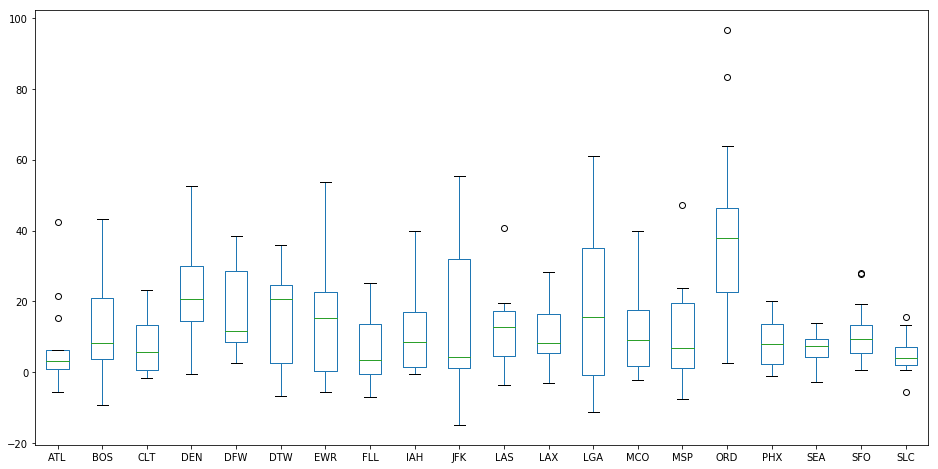

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8])


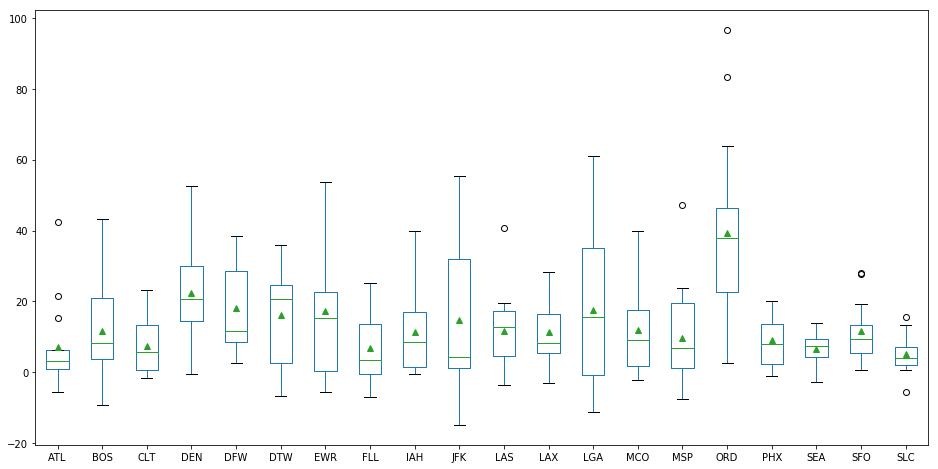

In [32]:
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8],showmeans=True)